# Customer Purchase & Behavior Analysis

## Project Objective
To analyze customer purchasing and engagement behavior using e-commerce data and derive actionable business insights.


## Tech Stack
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Jupyter Notebook


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

sns.set_style('whitegrid')  

In [2]:
# Load the dataset
df=pd.read_csv("ecommerce_customer_churn_dataset.csv")
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [3]:
df.shape

(50000, 25)

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,...,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,...,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,...,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,...,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,...,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


## Dataset Overview
The dataset contains customer demographic details, purchase behavior, engagement metrics, and churn information such as total purchases, average order value, login frequency, and lifetime value.


In [14]:
#Data Cleaning 
df.isnull().sum()


Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
Signup_Quarter                      0
dtype: int64

In [15]:
df["Pages_Per_Session"].fillna(df["Pages_Per_Session"].median(), inplace=True)
df.isnull().sum()

C:\Users\muska\AppData\Local\Temp\ipykernel_26868\541732910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Pages_Per_Session"].fillna(df["Pages_Per_Session"].median(), inplace=True)


Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                   0
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
Signup_Quarter                      0
dtype: int64

In [16]:
df.groupby("Gender")["Average_Order_Value"].mean()

Gender
Female    121.865353
Male      124.642059
Other     117.708527
Name: Average_Order_Value, dtype: float64

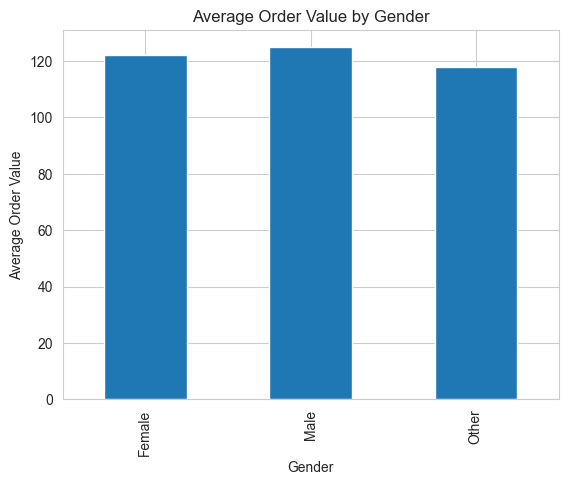

In [17]:
df.groupby("Gender")["Average_Order_Value"].mean().plot(kind="bar")
plt.title("Average Order Value by Gender")
plt.ylabel("Average Order Value")
plt.show()


<Figure size 800x500 with 0 Axes>

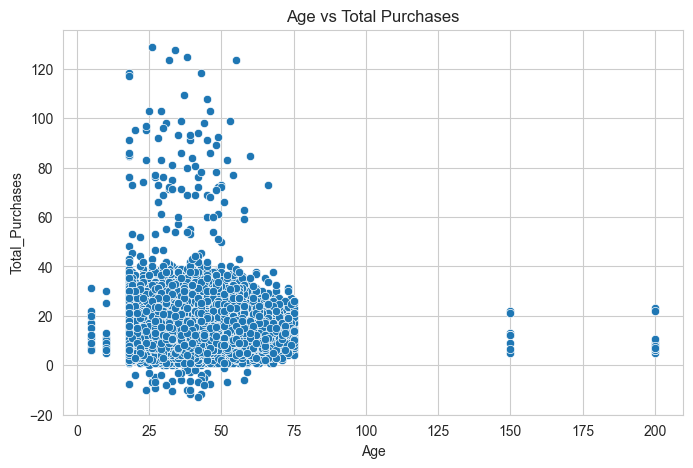

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Total_Purchases", data=df)
plt.title("Age vs Total Purchases")
plt.show()


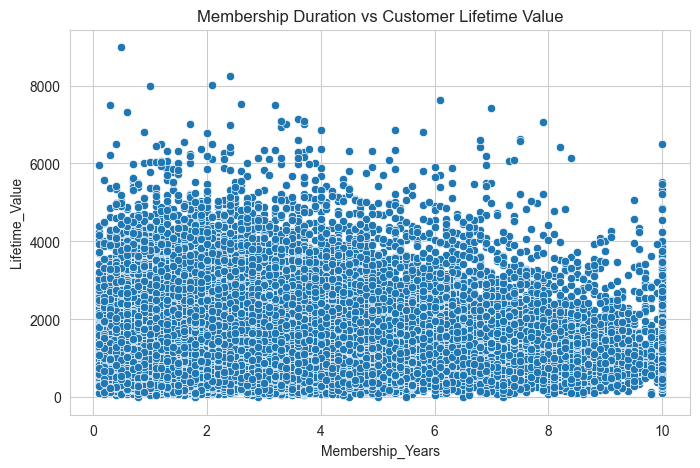

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Membership_Years",y="Lifetime_Value",data=df)
plt.title("Membership Duration vs Customer Lifetime Value")
plt.show()

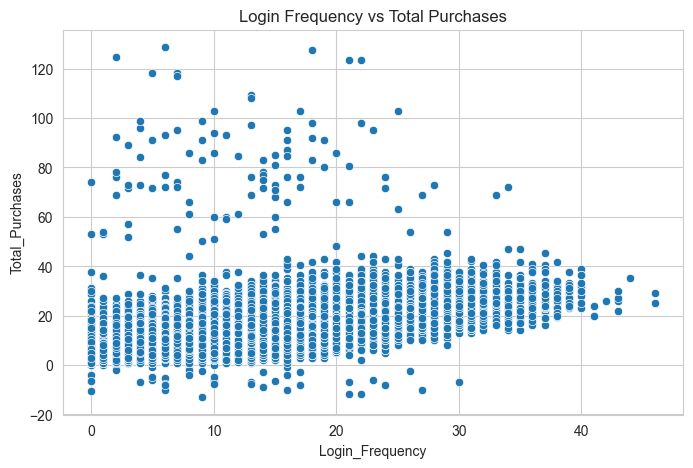

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Login_Frequency",
    y="Total_Purchases",
    data=df
)
plt.title("Login Frequency vs Total Purchases")
plt.show()

In [23]:
df.groupby("Country")["Lifetime_Value"].mean().sort_values(ascending=False)


Country
India        1458.122170
Japan        1457.026417
France       1451.532988
Germany      1447.675927
Australia    1443.163772
UK           1436.718782
USA          1435.923976
Canada       1427.204156
Name: Lifetime_Value, dtype: float64

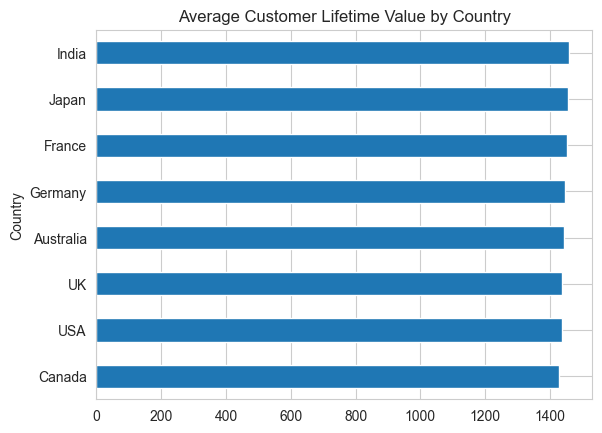

In [24]:
df.groupby("Country")["Lifetime_Value"].mean().sort_values().plot(kind="barh")
plt.title("Average Customer Lifetime Value by Country")
plt.show()

In [25]:
df.groupby("Churned")[["Total_Purchases", "Lifetime_Value"]].mean()


,Total_Purchases,Lifetime_Value
Churned,,
0,13.827522,1446.805875
1,11.350201,1425.423236


## Key Insights
- Customers with higher login frequency tend to make more purchases.
- Long-term members generate significantly higher lifetime value.
- Customers who churn show lower total purchases and engagement.
- Average order value varies across gender and regions.


## Conclusion
The analysis highlights key drivers of customer value and retention. Businesses can improve revenue by targeting high-engagement users and reducing churn through personalized offers and loyalty programs.
